# Ejercicio - *Support Vector Machines*

En este ejercicio, utilizaremos máquinas de vectores soporte (*SVM*) para construir un clasificador de *spam*. Empezaremos con *SVM* en algunos conjuntos de datos 2D sencillos para ver cómo funcionan. A continuación, realizaremos un trabajo de preprocesamiento en un conjunto de correos electrónicos sin procesar y crearemos un clasificador en los correos electrónicos procesados utilizando un *SVM* para determinar si son *spam* o no.

Lo primero que vamos a hacer es examinar un simple conjunto de datos bidimensional y ver cómo funciona un *SVM* lineal en el conjunto de datos para distintos valores de *C* (similar al término de regularización en regresión lineal/logística). Vamos a cargar los datos.
## Ejercicio 1
#### 1. Librerías

In [53]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
import scipy.io as sio

#### 2. Carga de datos
Carga el archivo *ejer_1_data1.mat*. Encuentra la manera de cargar este tipo de archivos (pista: **scipy.io**).

In [54]:
data1 = sio.loadmat("data\\ejer_1_data1.mat")
display(data1)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

#### 3. Crea un DataFrame con las variables explicativas y la variable objetivo

In [55]:
df1 = pd.DataFrame(data1['X'], columns=['x1','x2'])
df1['y'] = data1['y']
display(df1)

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


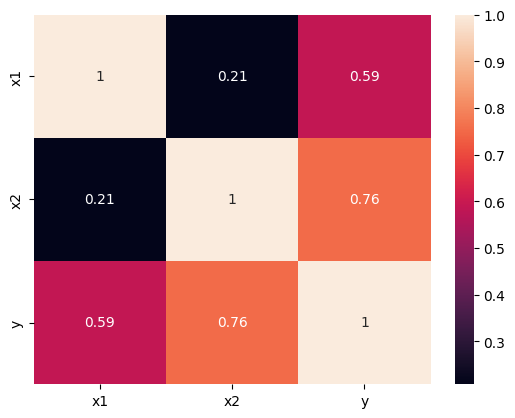

In [56]:
sns.heatmap(df1.corr(), annot=True);

#### 4. Visualiza una gráfica de dispersión con los datos

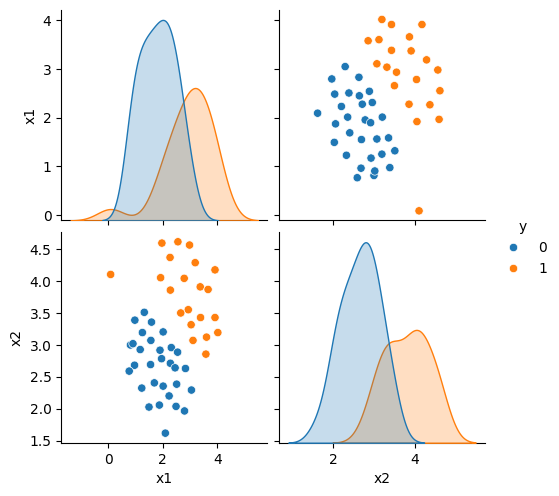

In [57]:
sns.pairplot(df1, hue='y');

Observe que hay un ejemplo positivo atípico que se aparta de los demás. Las clases siguen siendo linealmente separables, pero el ajuste es muy estrecho. Vamos a entrenar una máquina lineal de vectores soporte para aprender el límite (la frontera) de la clase.

#### 5. LinearSVC
Declara un *Linear SVC* con los hiperparámetros:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [58]:
X = df1[['x1', 'x2']]
y = df1.y

In [59]:
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

svm = LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=42, dual=True)
svm.fit(X_scal, y)

LinearSVC(C=1, dual=True, loss='hinge', max_iter=10000, random_state=42)

#### 6. Evalua el modelo (*score*)
Para este primer experimento usaremos `C=1` y veremos cómo se ajusta.

In [60]:
svm.score(X_scal, y)

0.9803921568627451

Parece que clasifica mal el *outlier*.

#### 7. Aumenta el valor de *C* hasta que obtengas un clasificador perfecto.

In [146]:
from sklearn.model_selection import GridSearchCV, train_test_split

model = LinearSVC(loss='hinge', max_iter=10000, random_state=42, dual=True)
parameters = {"C": [1,10,20,50,100,150,200,250,500]}
svm_gs = GridSearchCV(estimator=model, param_grid=parameters, scoring="accuracy")

In [147]:
svm_gs.fit(X_scal,y)
display(svm_gs.best_score_, svm_gs.best_estimator_)

0.9800000000000001

LinearSVC(C=1, dual=True, loss='hinge', max_iter=10000, random_state=42)

In [140]:
svm1 = LinearSVC(C=30, loss='hinge', max_iter=10000, random_state=42, dual=True)
svm1.fit(X_scal, y)
svm1.score(X_scal, y)

1.0

Esta vez hemos obtenido una clasificación perfecta de los datos de entrenamiento, sin embargo, al aumentar el valor de C hemos creado un límite de decisión que ya no se ajusta naturalmente a los datos.  Podemos visualizar esto observando el nivel de confianza para cada predicción de clase, que es una función de la distancia del punto al hiperplano.

#### 8. Representar la función de decisión
Obtenga la salida de `decision_function()` para el primer modelo. Visualice un gráfico de dispersión con X1, X2 y un rango de colores basado en `decision_function()`.

In [64]:
des_svm = svm.decision_function(X_scal)
print(des_svm)

[ 2.62283759  1.24547709  4.01279025  1.43372315  0.64099392  2.11138727
  1.77899587  4.39748773  2.43514965  3.52312423  2.95494994  0.49084457
  1.21145197  2.49770193  0.90722628  3.62752962  3.2700884   2.5451665
  1.33409206  0.99994392 -0.99722536 -0.76187116 -1.88562759 -1.59673254
 -0.9374477  -0.99999999 -1.52098878 -2.9716336  -2.07544965 -3.80390109
 -2.86786369 -4.07669052 -1.6388647  -1.74130153 -2.6967361  -3.2074476
 -4.42950204 -3.57173    -2.66299004 -3.00176788 -1.80420011 -1.88646476
 -1.         -2.93223994 -1.52428539 -2.69961411 -4.57845781 -0.78211055
 -2.81737654 -4.08328372 -1.31038804]


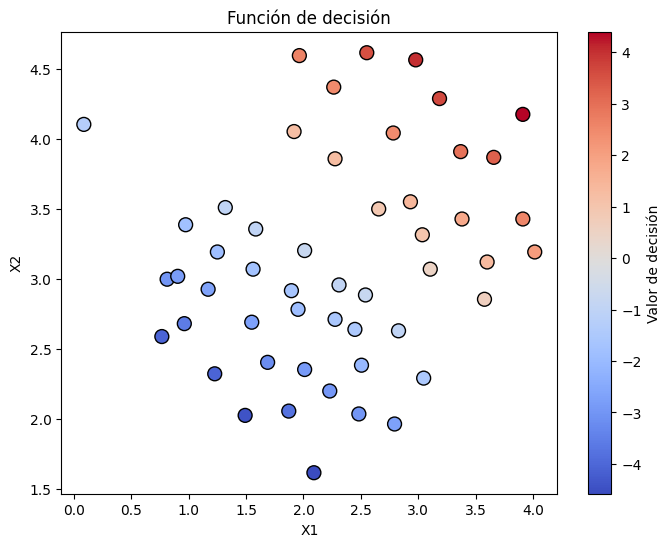

In [65]:
# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df1.x1, df1.x2, c=des_svm, cmap='coolwarm', s=100, edgecolors='k')
plt.colorbar(label='Valor de decisión')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Función de decisión')

plt.show()

#### 9. Haz lo mismo con el segundo modelo

In [66]:
des_svm1 = svm1.decision_function(X_scal)
print(des_svm1)

[ 16.22736297   8.03550745  20.57485199   7.09101939   0.9999994
   7.47266767   7.58773939  19.85157424  12.8217175   19.24740615
  13.8321365    1.60161293   8.90999667  14.68239141   5.12685587
  17.92805676  14.64588335  10.06956039   4.5923183    4.49412667
  -1.76763835  -1.78290507  -7.54736784  -6.97405651  -3.5945476
  -5.45522152  -8.85303391 -14.84709234 -10.18228759 -17.43973769
 -12.90454411 -16.9756673   -6.07418797  -5.62887444 -10.6405272
 -13.74583593 -19.62113804 -13.52700071  -9.33994966 -10.07484397
  -4.22671403  -5.47738907  -1.         -13.89071382  -7.10187484
 -14.32895151 -22.17633412  -3.45437046  -9.37326095 -15.6503324
   0.99982388]


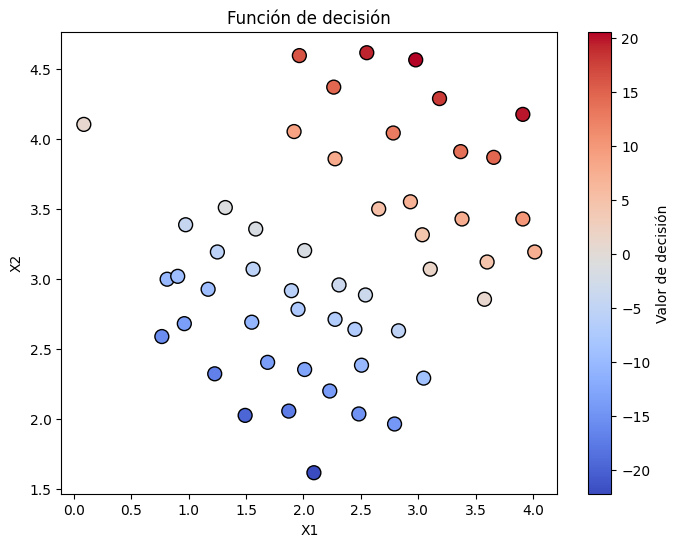

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(df1.x1, df1.x2, c=des_svm1, cmap='coolwarm', s=100, edgecolors='k')
plt.colorbar(label='Valor de decisión')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Función de decisión')

plt.show()

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

Ahora vamos a pasar de un *SVM* lineal a uno que es capaz de realizar una clasificación no lineal utilizando *kernels*. Primero, tenemos la tarea de implementar una función de *kernel* gaussiano. Aunque scikit-learn tiene un *kernel* gaussiano incorporado, por transparencia vamos a implementar uno desde cero.

## Ejercicio 2

A continuación vamos a examinar otro conjunto de datos, esta vez con un límite de decisión no lineal.

#### 1. Carga los datos `ejer_1_data2.mat`

In [68]:
data2 = sio.loadmat("data\\ejer_1_data2.mat")
display(data2)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

#### 2. Crea un DataFrame con las variables explicativas y la variable objetivo

In [69]:
df2 = pd.DataFrame(data2['X'], columns=['x1','x2'])
df2['y'] = data2['y']
display(df2)

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


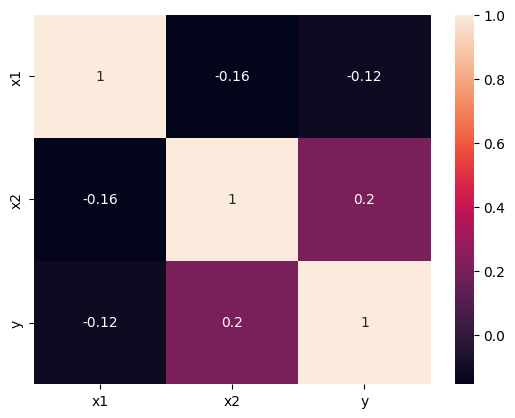

In [70]:
sns.heatmap(df2.corr(), annot=True);

#### 3. Visualiza una gráfica de dispersión con los datos

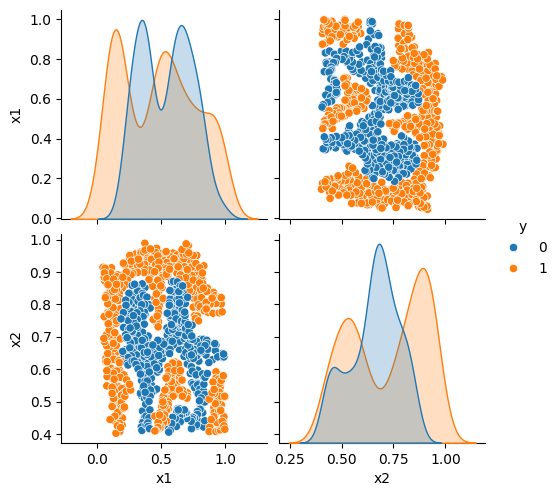

In [71]:
sns.pairplot(df2, hue='y');

Para este conjunto de datos construiremos un clasificador de máquina de vectores de soporte utilizando el núcleo RBF incorporado y examinaremos su precisión en los datos de entrenamiento. Para visualizar el límite de decisión, esta vez sombrearemos los puntos en función de la probabilidad prevista de que la instancia tenga una etiqueta de clase negativa. Veremos en el resultado que acierta en la mayoría de los casos.

#### 4. Declara un *SVC* con estos hiperparámetros
```Python
SVC(C=100, gamma=10, probability=True)
```

In [72]:
X2 = df2[['x1', 'x2']]
y2 = df2.y

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.2, random_state=42)

In [74]:
scaler = StandardScaler()
X_scal_train = scaler.fit_transform(X_train)

X_scal_test = scaler.transform(X_test)

svc = SVC(C=100, gamma=10, probability=True, random_state=42)
svc.fit(X_scal_train, y_train)
svc.score(X_scal_train, y_train)

1.0

In [75]:
prediction = svc.predict(X_scal_test)
print(prediction)

[1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1]


In [76]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

display(confusion_matrix(y_test, prediction), precision_score(y_test, prediction, average='macro'),
        recall_score(y_test, prediction, average='macro'), accuracy_score(y_test, prediction))

array([[85,  0],
       [ 2, 86]], dtype=int64)

0.9885057471264368

0.9886363636363636

0.9884393063583815

#### 5. Ajusta el clasificador y obten la bondad de ajuste del modelo

In [89]:
svc1 = SVC(C=1, gamma=10, probability=True, random_state=42)
svc1.fit(X_scal_train, y_train)
print(svc1.score(X_scal_train, y_train))
prediction1 = svc1.predict(X_scal_test)

0.9985507246376811


In [90]:
display(confusion_matrix(y_test, prediction1), precision_score(y_test, prediction1, average='macro'),
        recall_score(y_test, prediction1, average='macro'), accuracy_score(y_test, prediction1))

array([[85,  0],
       [ 1, 87]], dtype=int64)

0.9941860465116279

0.9943181818181819

0.9942196531791907

In [91]:
prediction_proba1 = svc1.predict_proba(X_scal_test)
print(prediction_proba1)

[[8.57533436e-03 9.91424666e-01]
 [7.25434346e-03 9.92745657e-01]
 [1.31969745e-02 9.86803025e-01]
 [9.99689319e-01 3.10681186e-04]
 [9.98602181e-01 1.39781859e-03]
 [5.19622262e-06 9.99994804e-01]
 [9.99465555e-01 5.34445409e-04]
 [9.98841851e-01 1.15814944e-03]
 [9.98723856e-01 1.27614353e-03]
 [4.76722967e-06 9.99995233e-01]
 [3.82058308e-03 9.96179417e-01]
 [1.13601911e-02 9.88639809e-01]
 [9.99125340e-01 8.74660464e-04]
 [1.70032074e-05 9.99982997e-01]
 [9.96925668e-01 3.07433174e-03]
 [9.99761400e-01 2.38600428e-04]
 [9.99031317e-01 9.68682978e-04]
 [9.98433043e-01 1.56695726e-03]
 [9.98630515e-01 1.36948462e-03]
 [2.74633296e-03 9.97253667e-01]
 [9.99177018e-01 8.22982018e-04]
 [9.99434664e-01 5.65335989e-04]
 [9.99316617e-01 6.83383467e-04]
 [7.49962002e-03 9.92500380e-01]
 [2.03715727e-02 9.79628427e-01]
 [6.81915270e-06 9.99993181e-01]
 [9.99973653e-01 2.63471313e-05]
 [9.71509803e-06 9.99990285e-01]
 [2.88745512e-03 9.97112545e-01]
 [7.83887734e-06 9.99992161e-01]
 [9.997224

#### 6. Visualiza el diagrama de dispersión y la probabilidad de predecir 0 con [*sequential color*](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

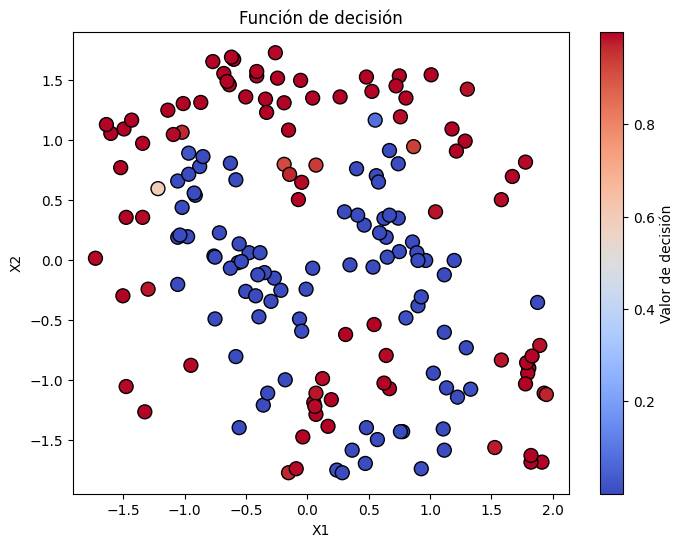

In [92]:
dfX= pd.DataFrame(X_scal_test, columns=['x1','x2'])

plt.figure(figsize=(8, 6))
plt.scatter(dfX.x1, dfX.x2, c=prediction_proba1[:,1], cmap='coolwarm', s=100, edgecolors='k')
plt.colorbar(label='Valor de decisión')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Función de decisión')

plt.show()